In [1]:
#Importing all the necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [3]:
sales_df = pd.read_csv("/walmart_cleaned.csv", encoding = 'unicode_escape')

In [5]:
sales_df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [7]:
sales_df.index

RangeIndex(start=0, stop=421570, step=1)

In [8]:
sales_df.columns

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [9]:
sales_df.shape

(421570, 17)

In [10]:
# Checking the data types of the columns
print(sales_df.dtypes)

Unnamed: 0        int64
Store             int64
Date             object
IsHoliday         int64
Dept            float64
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type              int64
Size              int64
dtype: object


In [15]:
# Checking for missing values
print(sales_df.isnull().sum())

Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


In [14]:
# Drop the unnamed column
sales_df = sales_df.drop(columns=['Unnamed: 0'])

In [16]:
# Checking for missing values
print(sales_df.isnull().sum())

Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


In [17]:
# Checking the summary statistics of the dataset
print(sales_df.describe())

               Store      IsHoliday           Dept   Weekly_Sales  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546       0.070358      44.260317   15981.258123   
std        12.785297       0.255750      30.492054   22711.183519   
min         1.000000       0.000000       1.000000   -4988.940000   
25%        11.000000       0.000000      18.000000    2079.650000   
50%        22.000000       0.000000      37.000000    7612.030000   
75%        33.000000       0.000000      74.000000   20205.852500   
max        45.000000       1.000000      99.000000  693099.360000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       60.090059       3.361027    2590.074819     879.974298   
std        18.447931       0.458515    6052.385934    5084.538801   
min        -2.060000       2.472000       0.000000    -265.760000   
25%        46.680000       2.9330

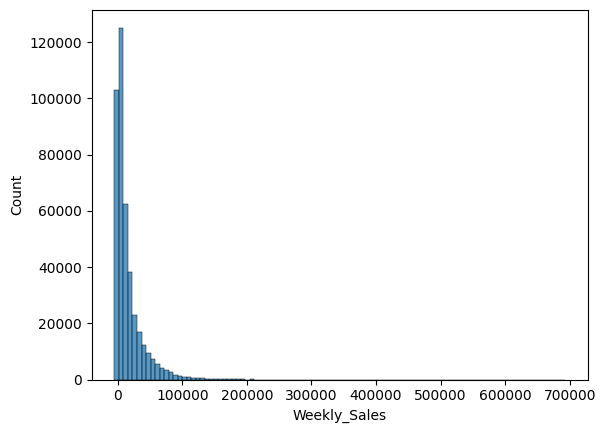

In [20]:
# Visualizing the distribution of the Weekly Sales variable
sns.histplot(sales_df['Weekly_Sales'], bins=100)
plt.show()

In [23]:
correlation_matrix = sales_df.corr()
sales_correlation = correlation_matrix['Weekly_Sales'].sort_values(ascending=False)

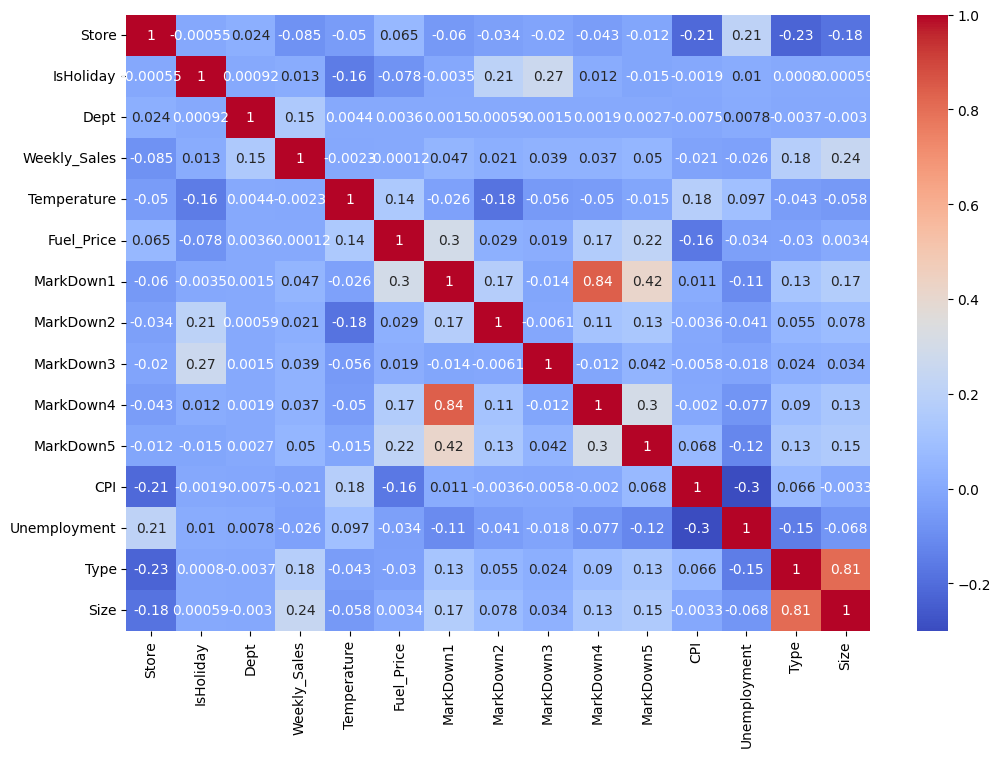

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

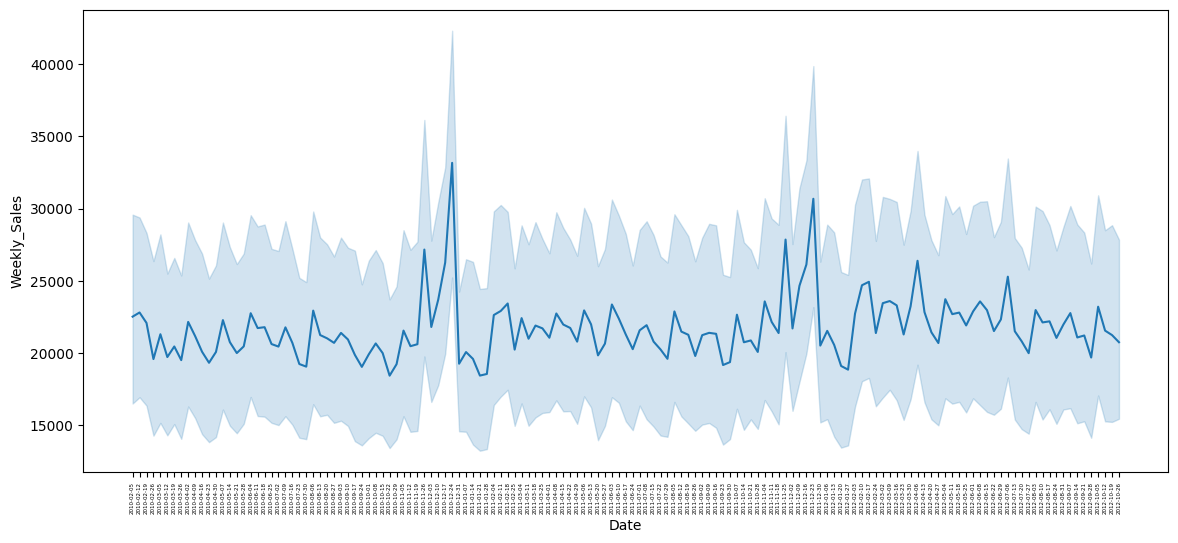

In [25]:
# Visualizing the trend of Weekly Sales over time for a single store
plt.figure(figsize=(14, 6))
store1_df = sales_df[sales_df['Store'] == 1]
sns.lineplot(x='Date', y='Weekly_Sales', data=store1_df)
plt.xticks(rotation=90, fontsize = 4)  # Rotate the x-axis labels by 90 degrees
plt.show()

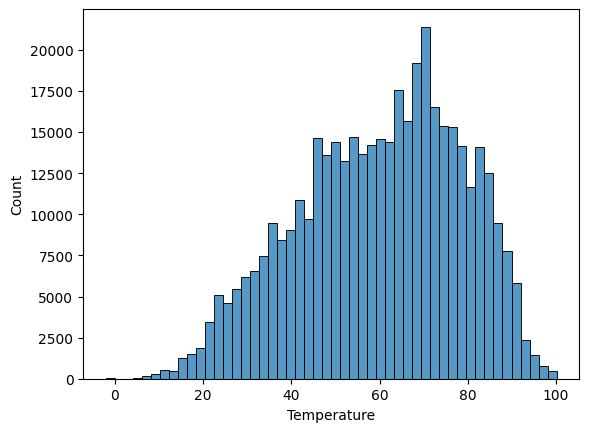

In [26]:
# Visualizing the distribution of other variables
sns.histplot(sales_df['Temperature'], bins=50)
plt.show()

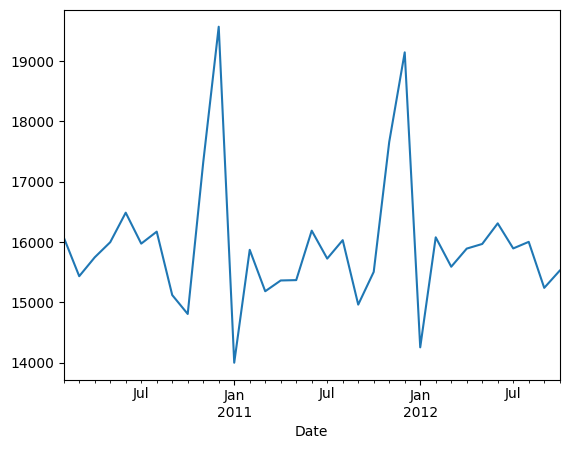

In [29]:
# Checking for seasonality or trends in the data
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.set_index('Date', inplace=True)
sales_df.resample('M').mean()['Weekly_Sales'].plot()
plt.show()